##### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Introduction
The purpose of this report is to analyze the house rental market in Abu Dhabi, focusing on rental prices, property characteristics, and trends across neighborhoods.


##### Loading Data

In [10]:
db = pd.read_csv('rentals_3bedr_Abu_Dhabi_2.csv')

### 2. General Analysis
This section provides an overview of the dataset, including basic statistics about rental properties and their distribution.


### 3. Descriptive Statistics - Rental Prices & Property Characteristics
Statistical measures such as mean, median, and standard deviation for rental prices, sizes.


In [11]:
print(db.head(), "\n")
print(db.info(), "\n")
print("Number of rows: ", len(db), "\n")
print("Maximum Price: ", db['Price'].max(), "\nMinimum Price: ", db['Price'].min(), "\n")

    Price  Nr Bedrooms  Nr Bathrooms                   Location  Size  \
0  130000            3             5   Al Khalidiyah, Abu Dhabi  2500   
1   60000            3             3   Al Khalidiyah, Abu Dhabi  1800   
2   80400            3             3   Al Khalidiyah, Abu Dhabi  1900   
3   78000            3             3   Al Khalidiyah, Abu Dhabi  2000   
4   60000            3             3   Al Khalidiyah, Abu Dhabi  1600   

  Unnamed: 5       City  
0       sqft  Abu Dhabi  
1       sqft  Abu Dhabi  
2       sqft  Abu Dhabi  
3       sqft  Abu Dhabi  
4       sqft  Abu Dhabi   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         322 non-null    int64  
 1   Nr Bedrooms   322 non-null    int64  
 2   Nr Bathrooms  321 non-null    float64
 3   Location      322 non-null    object 
 4   Size          322 non-null    int64 

In [12]:
pd.options.display.float_format = '{:.0f}'.format
db.describe()

,Price,Nr Bedrooms,Nr Bathrooms,Size
count,322,322,321,322
mean,126206,3,4,2296
std,94701,0,1,2755
min,50000,3,2,451
25%,80000,3,3,1750
50%,105000,3,4,2000
75%,145000,3,4,2400
max,1400000,3,6,50000


### Plotting

counts stores the count for each bar

patches stores the rectangle of each bar

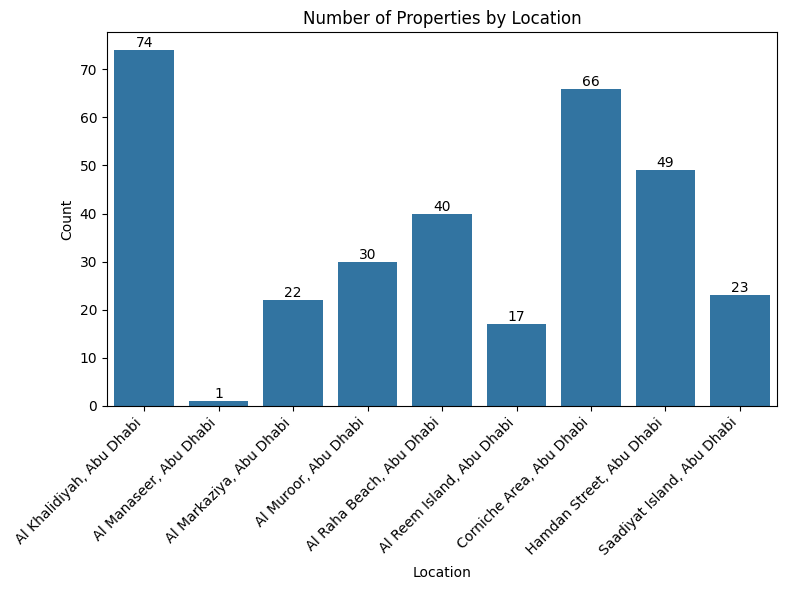

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=db, x='Location')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Properties by Location')
plt.tight_layout()

### 6. Box Plots
#### Rental Prices by Neighborhood
Visual representation of rental price ranges in each neighborhood.

#### Rental Prices by Property Type
Box plots to compare rental prices for different property types.


Location Statistics:
                           Price                               
                           count   mean    std     min      max
Location                                                       
 Al Khalidiyah, Abu Dhabi     74 101248  31103   55000   180000
 Al Manaseer, Abu Dhabi        1  85000    NaN   85000    85000
 Al Markaziya, Abu Dhabi      22 175873 276691   72500  1400000
 Al Muroor, Abu Dhabi         30  79667  19589   50000   125000
 Al Raha Beach, Abu Dhabi     40 156891  60710   80000   419999
 Al Reem Island, Abu Dhabi    17 133176  42061   85000   270000
 Corniche Area, Abu Dhabi     66 121167  38850   60000   220000
 Hamdan Street, Abu Dhabi     49  81428  19062   55000   150000
Saadiyat Island, Abu Dhabi    23 272826  68055  150000   430000


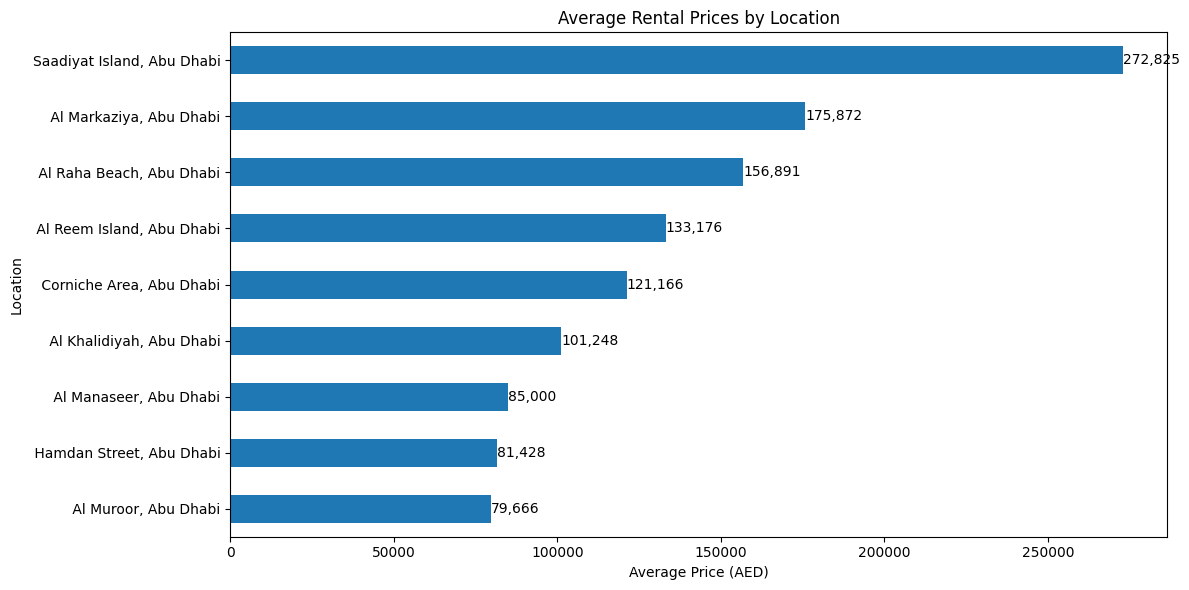

In [14]:
plt.figure(figsize=(12, 6))

location_prices = db.groupby('Location')['Price'].mean().sort_values(ascending=True)

location_prices.plot(kind='barh')
plt.title('Average Rental Prices by Location')
plt.xlabel('Average Price (AED)')
plt.ylabel('Location')

for i, v in enumerate(location_prices):
    plt.text(v, i, f'{int(v):,}', va='center')

location_stats = db.groupby('Location').agg({
    'Price': ['count', 'mean', 'std', 'min', 'max']
}).round(2)
print("\nLocation Statistics:")
print(location_stats)

plt.tight_layout()
plt.show()

The white dots represent individual properties with rental prices that are unusually high or low compared to other properties in the same location.

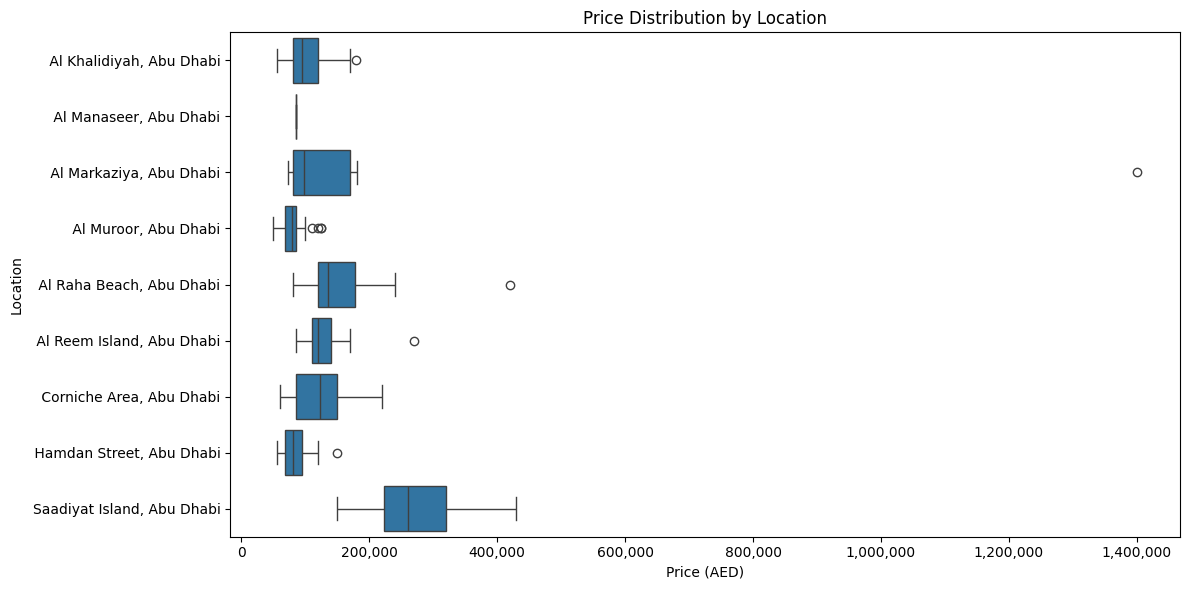

In [32]:
plt.figure(figsize=(12, 6))

# Create a break in the x-axis
sns.boxplot(x='Price', y='Location', data=db)
plt.title('Price Distribution by Location')
plt.xlabel('Price (AED)')
plt.ylabel('Location')

# Format x-axis to show full numbers with commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

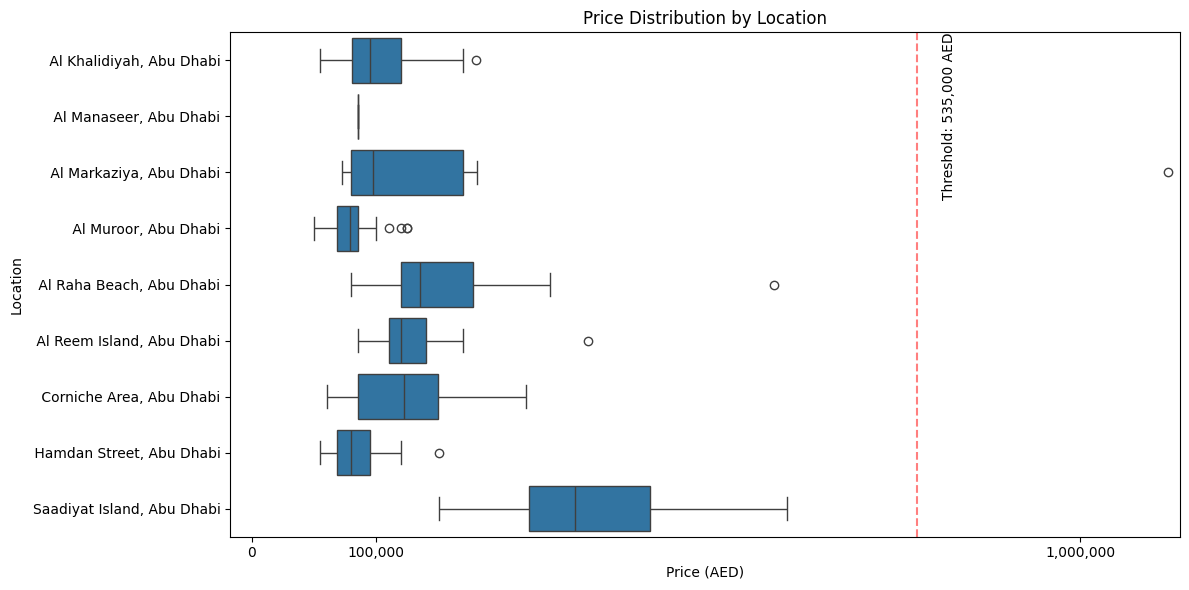

In [33]:
plt.figure(figsize=(12, 6))

# Calculate price threshold for splitting data (e.g. 75th percentile + 1.5 * IQR)
q75 = db['Price'].quantile(0.75)
q25 = db['Price'].quantile(0.25)
iqr = q75 - q25
threshold = q75 + 6 * iqr

# Create a break in the x-axis
sns.boxplot(x='Price', y='Location', data=db)
plt.title('Price Distribution by Location')
plt.xlabel('Price (AED)')
plt.ylabel('Location')

# Create the break
ax = plt.gca()  # Get the current Axes instance
ax.set_xscale('symlog', linthresh=threshold)  
ax.axvline(x=threshold, color='r', linestyle='--', alpha=0.5)
plt.text(threshold*1.1, ax.get_ylim()[1], f'Threshold: {int(threshold):,} AED', 
         rotation=90, verticalalignment='top')

# Format x-axis to show full numbers with commas
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### 7. Q-Q Plots
#### Rental Price Distribution
Assessing the normality of rental price distribution using Q-Q plots.

#### Property Size & Rental Prices
Analyzing the relationship between property size and rental prices.


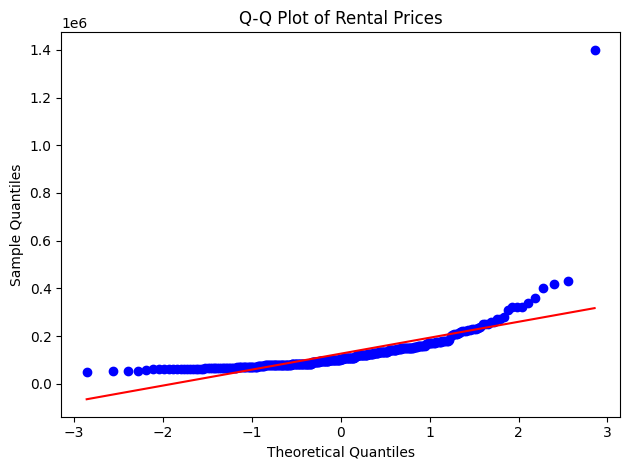

In [17]:
# Create Q-Q plot with raw prices
stats.probplot(db['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Rental Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

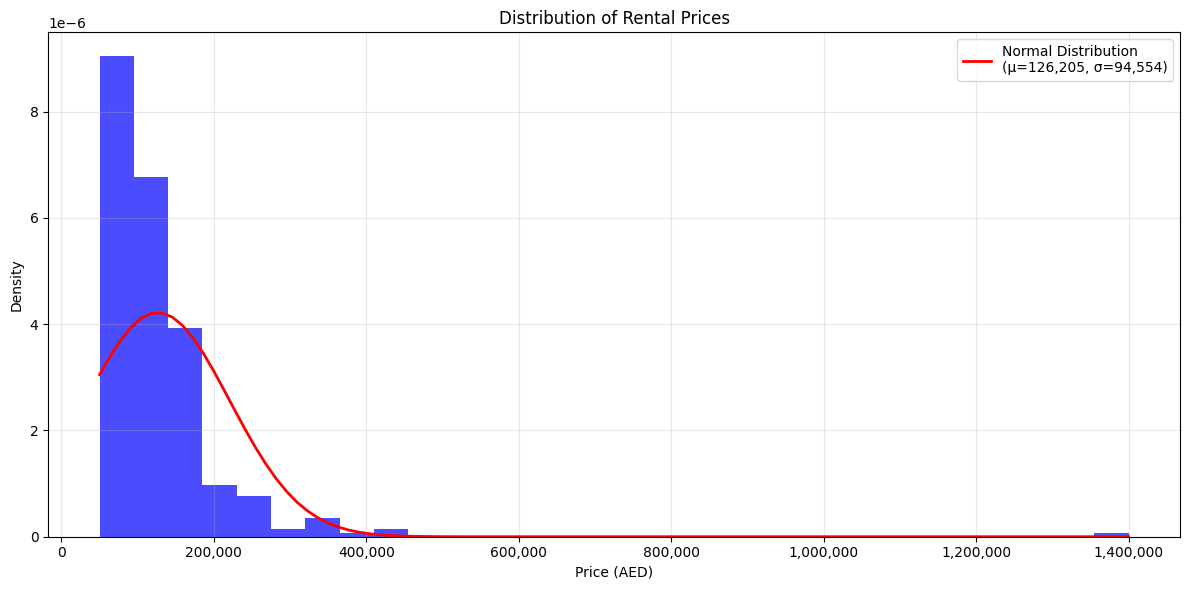

In [26]:
plt.figure(figsize=(12, 6))

# Create histogram of raw prices
counts, bins, _ = plt.hist(db['Price'], bins=30, density=True, alpha=0.7, color='blue')

# Calculate mean and standard deviation of raw prices
mu = np.mean(db['Price'])
sigma = np.std(db['Price'])

# Create normal distribution curve
x = np.linspace(min(bins), max(bins), 100)
gaussian = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, gaussian, 'r-', lw=2, label=f'Normal Distribution\n(μ={int(mu):,}, σ={int(sigma):,})')

plt.title('Distribution of Rental Prices')
plt.xlabel('Price (AED)')
plt.ylabel('Density')
plt.legend()

plt.grid(True, alpha=0.3)

# Format x-axis to show full numbers instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

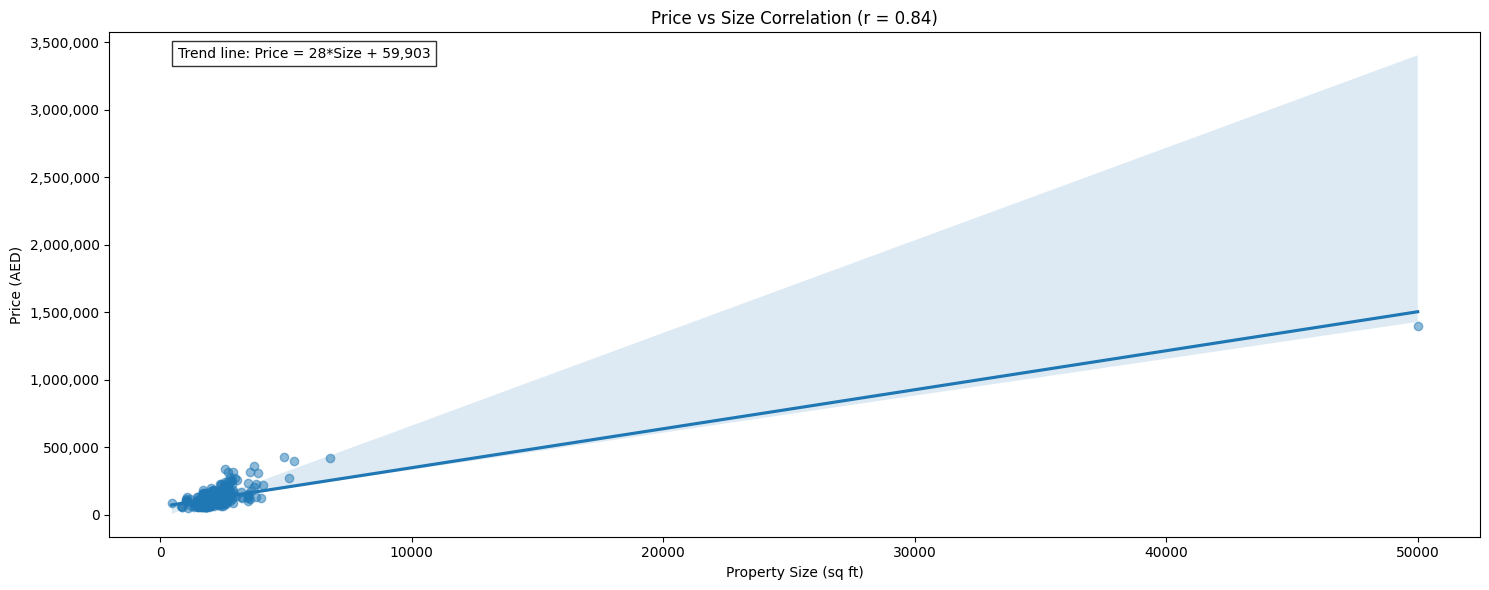

In [31]:
plt.figure(figsize=(15, 6))

correlation = db['Size'].corr(db['Price'])

sns.regplot(x='Size', y='Price', data=db, scatter_kws={'alpha':0.5})
plt.title(f'Price vs Size Correlation (r = {correlation:.2f})')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Price (AED)')

z = np.polyfit(db['Size'], db['Price'], 1)
trend_text = f'Trend line: Price = {int(z[0])}*Size + {int(z[1]):,}'
plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### 9. Confidence Intervals
Calculating confidence intervals for average rental prices across different neighborhoods and property types.


posx and posy should be finite values
posx and posy should be finite values


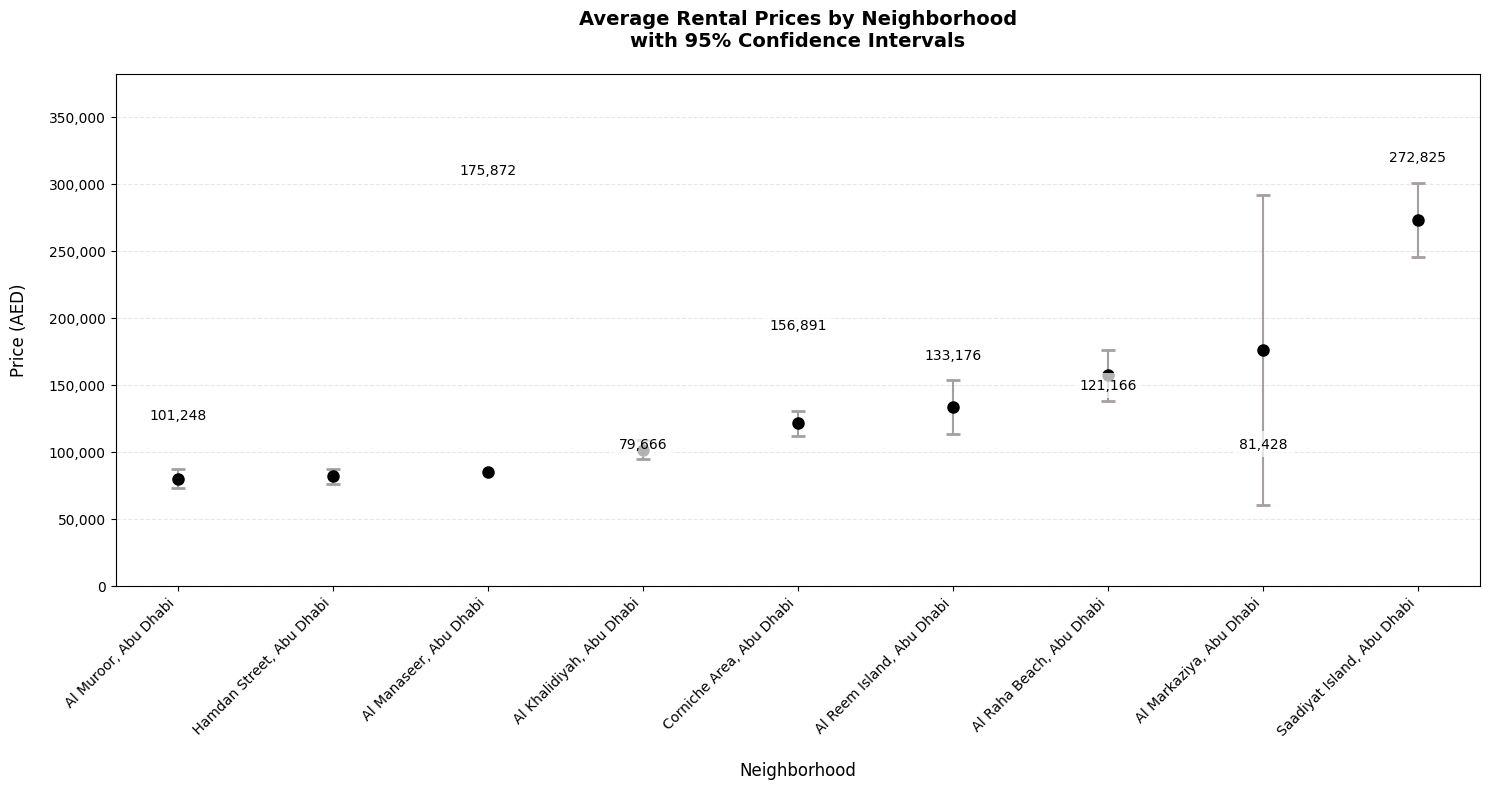

In [20]:
neighborhood_stats = db.groupby('Location')['Price'].agg(['mean', 'count', 'std']).reset_index()
neighborhood_stats['ci'] = 1.96 * neighborhood_stats['std'] / np.sqrt(neighborhood_stats['count'])

neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=True)

plt.figure(figsize=(15, 8))

plt.errorbar(neighborhood_stats['Location'], 
            neighborhood_stats['mean'],
            yerr=neighborhood_stats['ci'],
            fmt='o',
            capsize=5,
            capthick=2,
            markersize=8,
            color='#000000',
            ecolor='#a69f9f')

for i, row in neighborhood_stats.iterrows():
    y_pos = row['mean'] + row['ci'] + (max(neighborhood_stats['mean']) * 0.05)
    
    plt.text(i, y_pos, f'{int(row["mean"]):,}', 
             ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Average Rental Prices by Neighborhood\nwith 95% Confidence Intervals',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood', labelpad=15, fontsize=12)
plt.ylabel('Price (AED)', labelpad=15, fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

plt.gca().set_facecolor('#FFFFFF')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.ylim(0, max(neighborhood_stats['mean']) * 1.4)

plt.tight_layout()

plt.show()

# Everything without outliers

# Box Plot

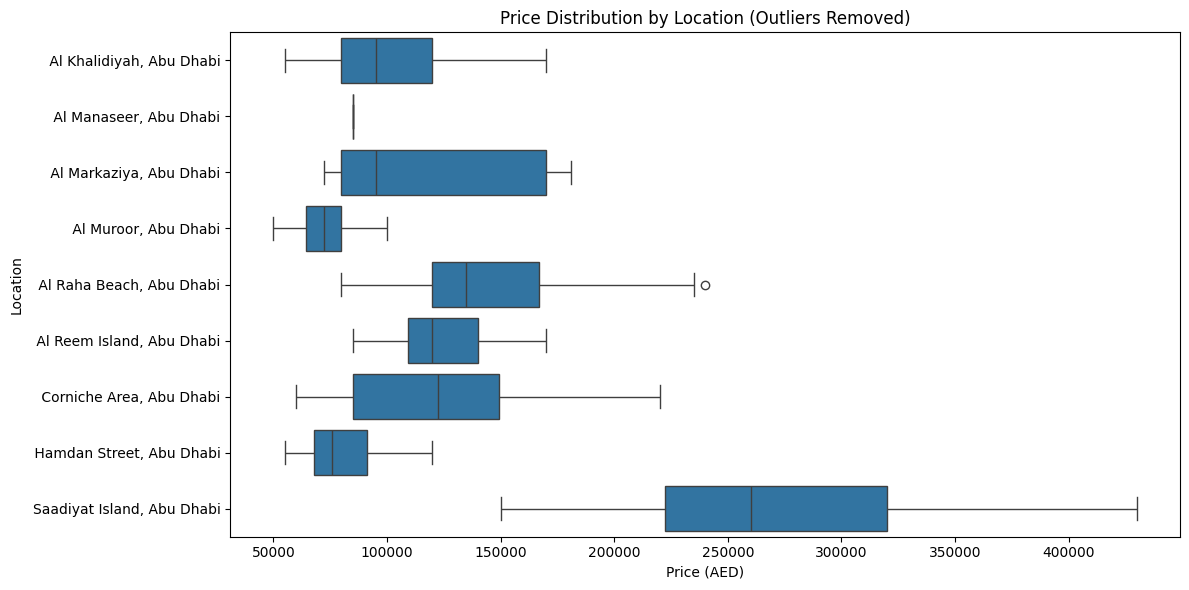

In [21]:
plt.figure(figsize=(12, 6))

# Calculate outlier cutoffs for Price by Location
outlier_filtered_db = pd.DataFrame()
for location in db['Location'].unique():
    location_data = db[db['Location'] == location]
    Q1 = location_data['Price'].quantile(0.25)
    Q3 = location_data['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_location = location_data[
        (location_data['Price'] >= lower_bound) & 
        (location_data['Price'] <= upper_bound)
    ]
    outlier_filtered_db = pd.concat([outlier_filtered_db, filtered_location])

# Create boxplot without outliers
sns.boxplot(x='Price', y='Location', data=outlier_filtered_db)
plt.title('Price Distribution by Location (Outliers Removed)')
plt.xlabel('Price (AED)')
plt.ylabel('Location')

plt.tight_layout()
plt.show()

### Q-Q Plots
#### Rental Price Distribution
Assessing the normality of rental price distribution using Q-Q plots.

#### Property Size & Rental Prices
Analyzing the relationship between property size and rental prices.


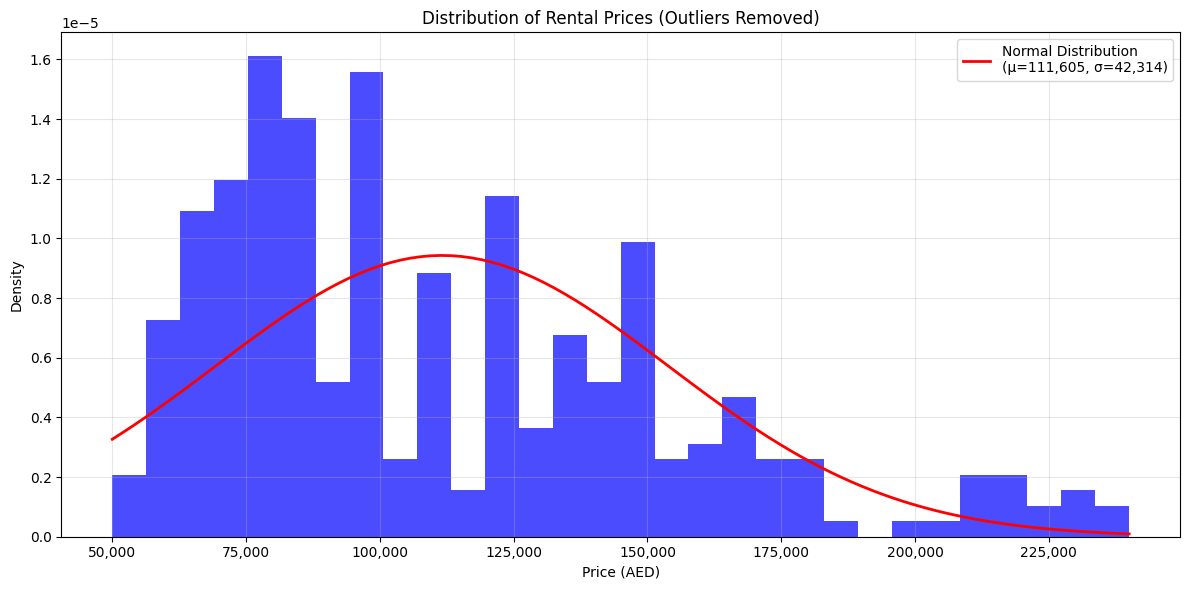

In [30]:
plt.figure(figsize=(12, 6))

# Remove outliers using IQR method
Q1 = db['Price'].quantile(0.25)
Q3 = db['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_db = db[(db['Price'] >= lower_bound) & (db['Price'] <= upper_bound)]

# Create histogram of filtered prices
counts, bins, _ = plt.hist(filtered_db['Price'], bins=30, density=True, alpha=0.7, color='blue')

# Calculate mean and standard deviation of filtered prices
mu = np.mean(filtered_db['Price'])
sigma = np.std(filtered_db['Price'])

# Create normal distribution curve
x = np.linspace(min(bins), max(bins), 100)
gaussian = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, gaussian, 'r-', lw=2, label=f'Normal Distribution\n(μ={int(mu):,}, σ={int(sigma):,})')

plt.title('Distribution of Rental Prices (Outliers Removed)')
plt.xlabel('Price (AED)')
plt.ylabel('Density')
plt.legend()

plt.grid(True, alpha=0.3)

# Format x-axis to show full numbers instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

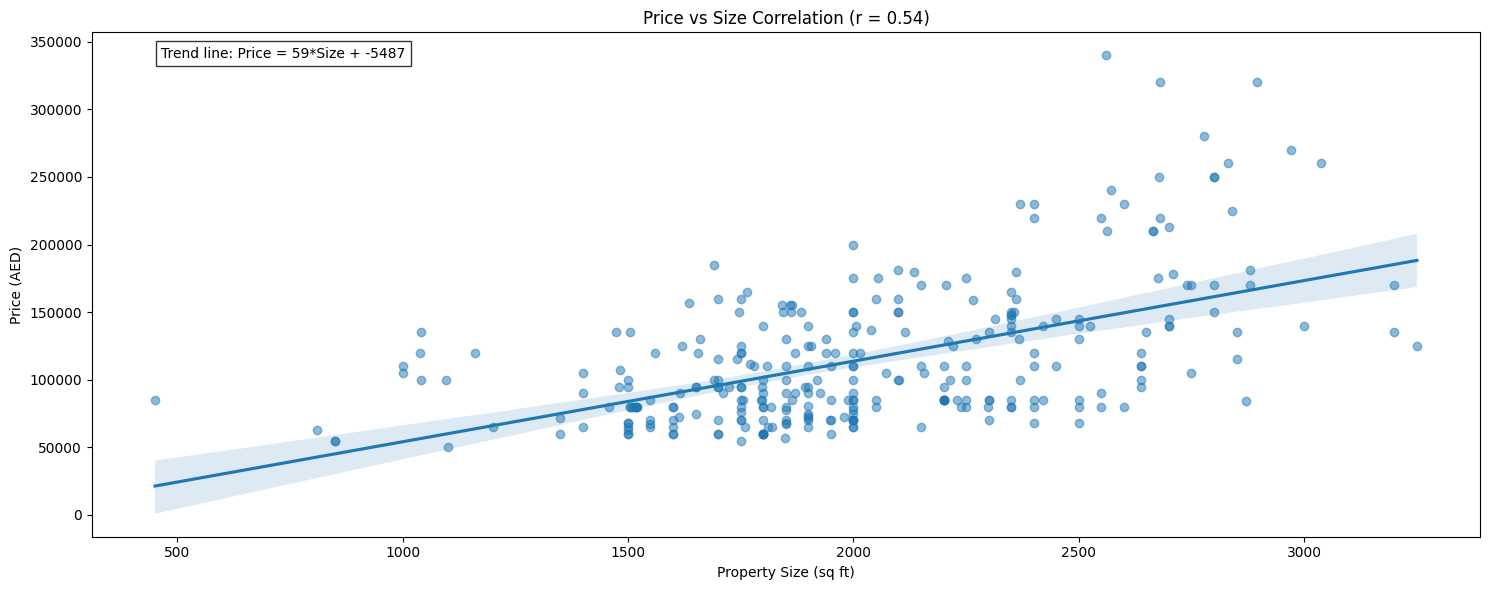

Number of properties removed as outliers: 21


In [27]:
#no outlier
plt.figure(figsize=(15, 6))

Q1 = db['Size'].quantile(0.25)
Q3 = db['Size'].quantile(0.75)
IQR = Q3 - Q1
size_outlier_cutoff = Q3 + 1.5 * IQR
db_filtered = db[db['Size'] <= size_outlier_cutoff]

correlation = db_filtered['Size'].corr(db_filtered['Price'])

sns.regplot(x='Size', y='Price', data=db_filtered, scatter_kws={'alpha':0.5})
plt.title(f'Price vs Size Correlation (r = {correlation:.2f})')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Price (AED)')

z = np.polyfit(db_filtered['Size'], db_filtered['Price'], 1)
trend_text = f'Trend line: Price = {int(z[0])}*Size + {int(z[1])}'
plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Number of properties removed as outliers: {len(db) - len(db_filtered)}")

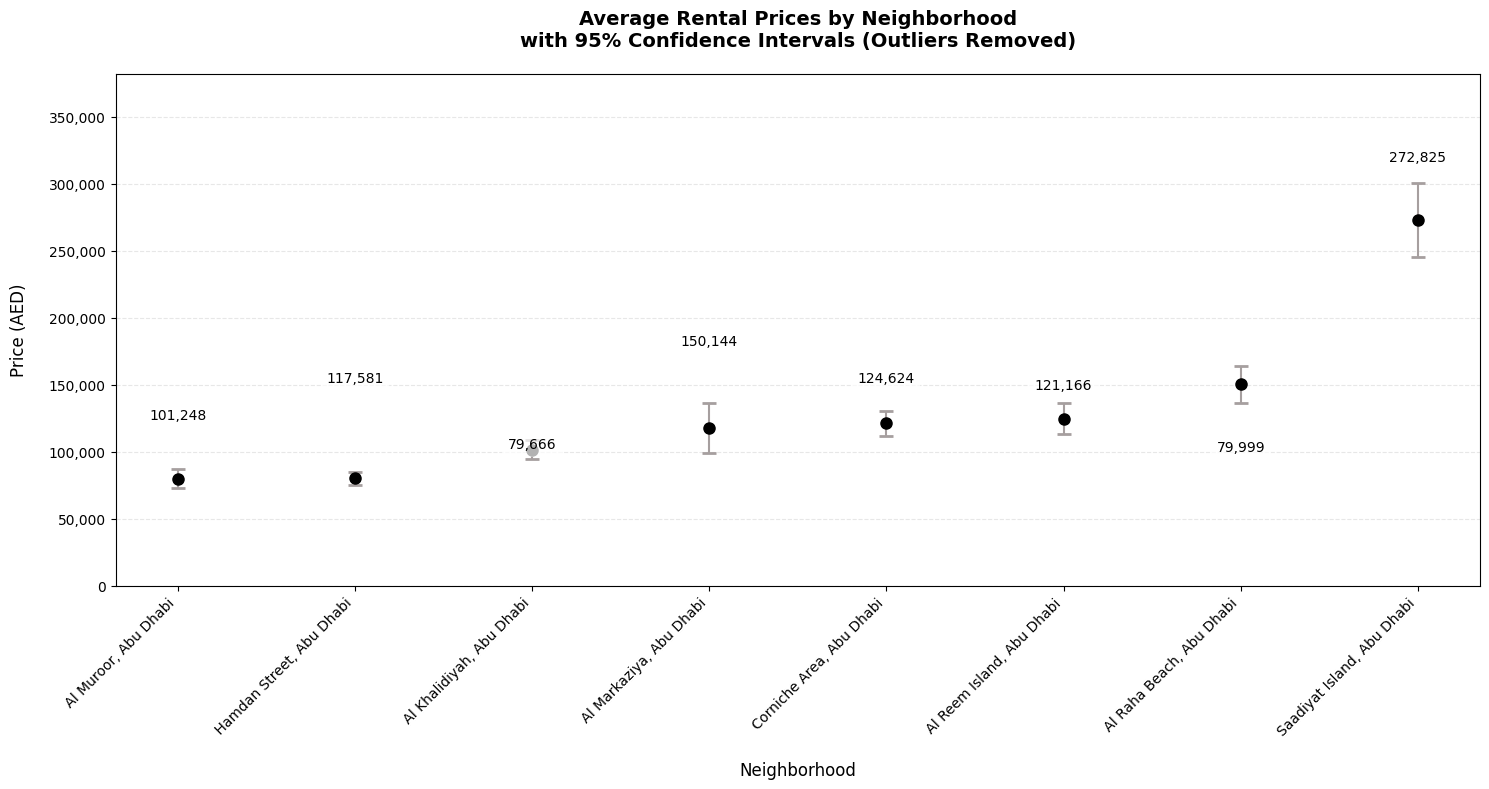

In [23]:
# Calculate outlier thresholds for each neighborhood
outlier_stats = db.groupby('Location')['Price'].agg(['mean', 'std']).reset_index()
outlier_stats['upper_bound'] = outlier_stats['mean'] + 3 * outlier_stats['std']
outlier_stats['lower_bound'] = outlier_stats['mean'] - 3 * outlier_stats['std']

# Filter out outliers
filtered_db = pd.DataFrame()
for location in db['Location'].unique():
    location_bounds = outlier_stats[outlier_stats['Location'] == location].iloc[0]
    location_data = db[db['Location'] == location]
    filtered_location = location_data[
        (location_data['Price'] <= location_bounds['upper_bound']) &
        (location_data['Price'] >= location_bounds['lower_bound'])
    ]
    filtered_db = pd.concat([filtered_db, filtered_location])

# Calculate statistics on filtered data
neighborhood_stats = filtered_db.groupby('Location')['Price'].agg(['mean', 'count', 'std']).reset_index()
neighborhood_stats['ci'] = 1.96 * neighborhood_stats['std'] / np.sqrt(neighborhood_stats['count'])

neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=True)

plt.figure(figsize=(15, 8))

plt.errorbar(neighborhood_stats['Location'], 
            neighborhood_stats['mean'],
            yerr=neighborhood_stats['ci'],
            fmt='o',
            capsize=5,
            capthick=2,
            markersize=8,
            color='#000000',
            ecolor='#a69f9f')

for i, row in neighborhood_stats.iterrows():
    y_pos = row['mean'] + row['ci'] + (max(neighborhood_stats['mean']) * 0.05)
    
    plt.text(i, y_pos, f'{int(row["mean"]):,}', 
             ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Average Rental Prices by Neighborhood\nwith 95% Confidence Intervals (Outliers Removed)',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood', labelpad=15, fontsize=12)
plt.ylabel('Price (AED)', labelpad=15, fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

plt.gca().set_facecolor('#FFFFFF')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.ylim(0, max(neighborhood_stats['mean']) * 1.4)

plt.tight_layout()

plt.show()

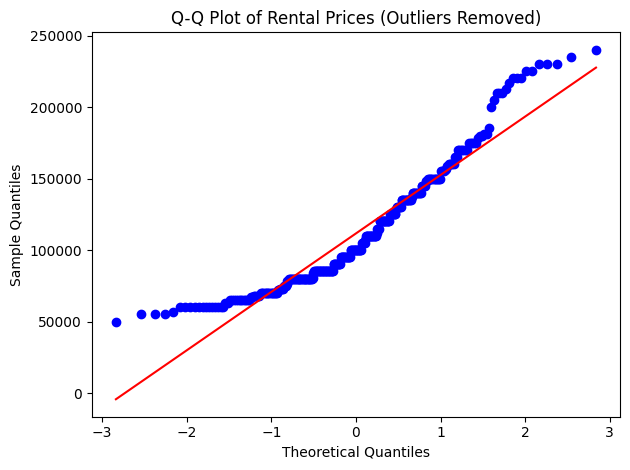

In [35]:
# Create Q-Q plot with filtered prices (outliers removed)
filtered_prices = filtered_db['Price']  # Using filtered_db which has outliers removed
stats.probplot(filtered_prices, dist="norm", plot=plt)
plt.title('Q-Q Plot of Rental Prices (Outliers Removed)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

<span style="color: Cyan; font-size: 24px;">95% confidence intervals for the average price for a 3 bedroom apartments in Cornische Area and Hamdan Street:</span>

In [24]:
# Calculate and display 95% confidence intervals for Cornische Area and Hamdan Street
locations = [' Corniche Area, Abu Dhabi', ' Hamdan Street, Abu Dhabi']
for location in locations:
    location_data = filtered_db[filtered_db['Location'] == location]
    
    mean_price = location_data['Price'].mean()
    std_price = location_data['Price'].std()
    n = len(location_data)
    ci = 1.96 * std_price / np.sqrt(n)

    print(f"\n95% Confidence Interval for Average Rental Price in {location.strip(' , Abu Dhabi')}:")
    print(f"Mean Price: {int(mean_price):,} AED")
    print(f"Confidence Interval: ({int(mean_price - ci):,}, {int(mean_price + ci):,}) AED")
    print(f"Margin of Error: ±{int(ci):,} AED")
    print(f"Sample Size: {n}")



95% Confidence Interval for Average Rental Price in Corniche Are:
Mean Price: 121,166 AED
Confidence Interval: (111,793, 130,539) AED
Margin of Error: ±9,372 AED
Sample Size: 66

95% Confidence Interval for Average Rental Price in Hamdan Street:
Mean Price: 79,999 AED
Confidence Interval: (75,360, 84,639) AED
Margin of Error: ±4,639 AED
Sample Size: 48
